In [1]:
import os
import tarfile
import urllib
import numpy as np 
import pandas as pd 
from sklearn import preprocessing

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

#the profiles  have been created with per well averages of data extracted from the sql db to give a 'profile' for each cell
#download the data 
cellpainting = os.path.join("datasets", "work")

#write function for fetching data in to parking path


#actually retrieve the data



def load_painting_data(cell_path=cellpainting):
    csv_path = os.path.join(cell_path, "cellpainting.csv")
    return pd.read_csv(csv_path)

cellPD = load_painting_data()
print(cellPD)

      Image_Metadata_Plate Image_Metadata_Well Image_Metadata_6merSeed_12to17  \
0                    38034                 p20                         TTGGGT   
1                    38003                 d17                         CACTAC   
2                    37983                 j03                         GTGTTC   
3                    38002                 i23                         ACTTCT   
4                    38003                 h10                         GGTGTT   
...                    ...                 ...                            ...   
3067                 38004                 h23                         CCAAAG   
3068                 38006                 e24                         TGGACT   
3069                 38030                 j22                         GCACCT   
3070                 38006                 g09                         TTGCAC   
3071                 38005                 e23                         GGCTCT   

     Image_Metadata_7merSee

In [2]:
cellPD.describe()

,Image_Metadata_Plate,Image_Metadata_IE,Image_Metadata_Number_of_shRNA,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,Cytoplasm_AreaShape_Extent,Cytoplasm_AreaShape_FormFactor,...,Nuclei_Texture_Variance_ERSyto_5_0,Nuclei_Texture_Variance_Hoechst_10_0,Nuclei_Texture_Variance_Hoechst_3_0,Nuclei_Texture_Variance_Hoechst_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_PhGolgi_10_0,Nuclei_Texture_Variance_PhGolgi_3_0,Nuclei_Texture_Variance_PhGolgi_5_0
count,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,...,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000,3072.000000
mean,38008.375000,0.776914,8.575521,0.026851,-0.011265,-0.027299,-0.066347,-0.076201,0.069450,0.123421,...,0.251958,-0.111206,-0.054328,-0.062028,0.136130,0.157982,0.154857,0.018803,0.082599,0.063466
std,15.307209,0.241120,3.430212,0.838957,0.127970,0.134328,0.275562,0.192371,0.256675,0.363081,...,0.253764,0.455580,0.455885,0.455256,0.182012,0.269871,0.244085,0.144821,0.226697,0.200359
min,37983.000000,0.010000,0.000000,-1.578284,-1.214848,-0.777465,-1.269394,-0.931549,-0.876879,-2.243430,...,-0.411246,-2.430449,-2.195508,-2.224811,-0.355051,-0.462033,-0.428432,-0.448365,-0.600153,-0.502877
25%,38002.750000,0.700000,6.000000,-0.272408,-0.080174,-0.103891,-0.241435,-0.193945,-0.071776,-0.034077,...,0.065162,-0.326452,-0.312071,-0.308867,0.004947,-0.033289,-0.018287,-0.077362,-0.079366,-0.076550
50%,38004.500000,0.800000,11.000000,-0.004631,-0.010337,-0.023081,-0.081011,-0.063333,0.061445,0.139736,...,0.217142,-0.117312,-0.084815,-0.088268,0.109100,0.119517,0.120380,0.009848,0.054554,0.042587
75%,38012.000000,0.910000,11.000000,0.249112,0.061785,0.051884,0.086679,0.039469,0.211598,0.323829,...,0.395145,0.129064,0.202327,0.190032,0.243853,0.312960,0.296467,0.104495,0.220569,0.182774
max,38034.000000,1.390000,11.000000,24.734875,0.942753,0.710258,1.453281,0.920147,1.916383,1.444866,...,1.479055,1.453739,1.980884,1.886757,1.158278,2.067694,1.760641,0.774926,1.281530,1.089287


In [3]:
cellPDnumbs = cellPD.iloc[:,16:]
cellPDnumbs

,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,Cytoplasm_AreaShape_Extent,Cytoplasm_AreaShape_FormFactor,Cytoplasm_AreaShape_MajorAxisLength,Cytoplasm_AreaShape_MaxFeretDiameter,Cytoplasm_AreaShape_MaximumRadius,...,Nuclei_Texture_Variance_ERSyto_5_0,Nuclei_Texture_Variance_Hoechst_10_0,Nuclei_Texture_Variance_Hoechst_3_0,Nuclei_Texture_Variance_Hoechst_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_PhGolgi_10_0,Nuclei_Texture_Variance_PhGolgi_3_0,Nuclei_Texture_Variance_PhGolgi_5_0
0,0.064591,0.015446,-0.159543,0.207621,0.090659,-0.260000,-0.175800,0.183459,0.183311,0.006546,...,0.177218,0.057657,0.187610,0.132751,0.051749,0.083742,0.057160,-0.022889,-0.081343,-0.062216
1,-0.191555,0.068221,-0.064115,-0.004073,-0.177918,-0.050956,0.002895,-0.195449,-0.201016,-0.207019,...,-0.065557,0.116068,0.097751,0.091044,0.017350,-0.088489,-0.076934,0.084669,0.034499,0.077773
2,0.601869,-0.018090,0.253895,-0.035206,0.289718,0.119902,0.287691,0.504931,0.528467,0.740397,...,0.053214,-0.667019,-0.658364,-0.653655,-0.123788,-0.209065,-0.162449,-0.068244,-0.041281,-0.053442
3,-0.754274,0.286147,-0.005110,0.716539,-0.033928,-0.586922,-0.399293,-0.418798,-0.433877,-0.803323,...,0.724201,-0.028492,-0.050048,-0.037313,0.440069,0.492818,0.507332,0.189169,0.272884,0.193952
4,0.382031,-0.030893,-0.020517,-0.408960,-0.211790,0.257678,0.137764,0.142684,0.209591,0.536171,...,0.362803,-0.093515,-0.057723,-0.050245,0.455663,0.517495,0.504023,-0.093500,-0.002023,-0.037486
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,-0.040268,0.020439,-0.143618,-0.456391,-0.259433,0.278275,0.372157,-0.226249,-0.151205,0.262998,...,0.342276,-0.031298,0.052520,0.085521,0.282200,0.563409,0.457114,-0.078065,0.176464,0.073620
3068,-0.161899,-0.093033,-0.033467,0.093528,0.009558,-0.025694,-0.087279,-0.125669,-0.135902,-0.193627,...,0.073781,0.247886,0.266311,0.241561,0.055524,0.087551,0.080948,0.167967,0.193872,0.186535
3069,0.243415,-0.010337,-0.089421,-0.367463,-0.760529,0.369817,0.363360,-0.055519,-0.049824,0.204945,...,0.768495,-0.439018,-0.261630,-0.322097,0.563111,0.844466,0.757355,0.342762,0.550049,0.430571
3070,-0.077108,0.011629,-0.069508,-0.275090,-0.186012,0.337060,0.395788,-0.181428,-0.189441,-0.058944,...,0.318673,-0.152974,-0.174114,-0.192935,0.174679,0.250523,0.209573,0.045054,0.145027,0.132369


In [4]:
col_names = list(cellPDnumbs.columns)

#use a scaler on the data so all values are between 1 and 0
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(cellPDnumbs)

cellPDnumbs = pd.DataFrame(df_mm, columns=col_names)
cellPDnumbs

,Cytoplasm_AreaShape_Area,Cytoplasm_AreaShape_Center_X,Cytoplasm_AreaShape_Center_Y,Cytoplasm_AreaShape_Compactness,Cytoplasm_AreaShape_Eccentricity,Cytoplasm_AreaShape_Extent,Cytoplasm_AreaShape_FormFactor,Cytoplasm_AreaShape_MajorAxisLength,Cytoplasm_AreaShape_MaxFeretDiameter,Cytoplasm_AreaShape_MaximumRadius,...,Nuclei_Texture_Variance_ERSyto_5_0,Nuclei_Texture_Variance_Hoechst_10_0,Nuclei_Texture_Variance_Hoechst_3_0,Nuclei_Texture_Variance_Hoechst_5_0,Nuclei_Texture_Variance_Mito_10_0,Nuclei_Texture_Variance_Mito_3_0,Nuclei_Texture_Variance_Mito_5_0,Nuclei_Texture_Variance_PhGolgi_10_0,Nuclei_Texture_Variance_PhGolgi_3_0,Nuclei_Texture_Variance_PhGolgi_5_0
0,0.062435,0.570214,0.415348,0.542487,0.552039,0.220845,0.560592,0.240624,0.238369,0.120030,...,0.311307,0.640573,0.570617,0.573397,0.268811,0.215744,0.221825,0.347813,0.275716,0.276769
1,0.052701,0.594674,0.479491,0.464734,0.406995,0.295684,0.609041,0.188781,0.188766,0.107660,...,0.182875,0.655611,0.549100,0.563253,0.246081,0.147662,0.160569,0.435737,0.337279,0.364693
2,0.082854,0.554671,0.693248,0.453300,0.659540,0.356852,0.686258,0.284609,0.282917,0.162533,...,0.245707,0.454002,0.368056,0.382131,0.152817,0.099998,0.121505,0.310737,0.297007,0.282279
3,0.031315,0.695678,0.519153,0.729405,0.484756,0.103806,0.499997,0.158222,0.158712,0.073124,...,0.600670,0.618394,0.513711,0.532035,0.525411,0.377452,0.427471,0.521163,0.463966,0.437662
4,0.074499,0.548737,0.508797,0.316025,0.388703,0.406176,0.645608,0.235045,0.241761,0.150705,...,0.409484,0.601653,0.511874,0.528890,0.535716,0.387207,0.425959,0.290090,0.317870,0.292301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3067,0.058450,0.572528,0.426052,0.298604,0.362973,0.413550,0.709159,0.184567,0.195195,0.134883,...,0.398626,0.617671,0.538270,0.561910,0.421092,0.405357,0.404530,0.302708,0.412725,0.362084
3068,0.053828,0.519936,0.500092,0.500582,0.508241,0.304728,0.584593,0.198329,0.197170,0.108436,...,0.256587,0.689548,0.589461,0.599862,0.271306,0.217250,0.232692,0.503831,0.421976,0.433003
3069,0.069231,0.558264,0.462481,0.331266,0.092359,0.446322,0.706774,0.207927,0.208279,0.131521,...,0.624103,0.512702,0.463050,0.462771,0.606716,0.516458,0.541685,0.646720,0.611262,0.586276
3070,0.057050,0.568445,0.475866,0.365194,0.402624,0.434595,0.715566,0.190700,0.190260,0.116237,...,0.386139,0.586345,0.484005,0.494185,0.350043,0.281673,0.291450,0.403353,0.396018,0.398983


In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cellPDnumbs)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
targ = cellPD['Image_Metadata_ASSAY_WELL_ROLE']
targ

0       Treated
1          CTRL
2       Treated
3       Treated
4       Treated
         ...   
3067    Treated
3068    Treated
3069    Treated
3070    Treated
3071    Treated
Name: Image_Metadata_ASSAY_WELL_ROLE, Length: 3072, dtype: object

In [6]:

finalDf = pd.concat([principalDf, cellPD['Image_Metadata_ASSAY_WELL_ROLE']], axis = 1)
finalDf


,principal component 1,principal component 2,Image_Metadata_ASSAY_WELL_ROLE
0,-0.236822,-0.722002,Treated
1,0.523541,-1.289277,CTRL
2,-0.181203,-0.761965,Treated
3,-1.579743,3.590280,Treated
4,-1.305488,-1.259764,Treated
...,...,...,...
3067,-0.570482,-0.713931,Treated
3068,1.125597,-1.252137,Treated
3069,-1.576949,1.064074,Treated
3070,0.256319,-0.426526,Treated


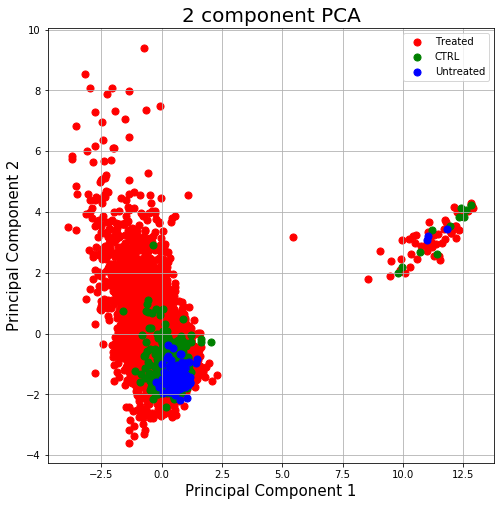

In [7]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Treated', 'CTRL', 'Untreated']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Image_Metadata_ASSAY_WELL_ROLE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [8]:
pca.explained_variance_ratio_
#we can see that PCA is not really working as only <50% of the variance is able to be explained using this method, 
#this may mean the data has a non linear relationship or no relationship
#but this is not needed for downstream classification or regression
#perhaps to be effective you would pick just a sub section of the features to do PCA on - i would like to ask some questions about this

array([0.26394298, 0.19857773])

In [9]:
#attempt with just cytoplasm
cyto = cellPD.iloc[:,16:447]
cyto.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3072 entries, 0 to 3071
Columns: 431 entries, Cytoplasm_AreaShape_Area to Cytoplasm_Texture_SumVariance_PhGolgi_10_0
dtypes: float64(431)
memory usage: 10.1 MB


In [10]:
col_names = list(cyto.columns)

#use a scaler on the data so all values are between 1 and 0
mm_scaler = preprocessing.MinMaxScaler()
df_mm = mm_scaler.fit_transform(cyto)

cytonumbs = pd.DataFrame(df_mm, columns=col_names)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(cytonumbs)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])
targ = cellPD['Image_Metadata_ASSAY_WELL_ROLE']
targ

finalDf = pd.concat([principalDf, cellPD['Image_Metadata_ASSAY_WELL_ROLE']], axis = 1)
finalDf


,principal component 1,principal component 2,Image_Metadata_ASSAY_WELL_ROLE
0,-0.322922,-0.159569,Treated
1,-0.548345,0.174376,CTRL
2,0.019964,-0.384374,Treated
3,2.229890,0.139992,Treated
4,-0.948519,-1.230939,Treated
...,...,...,...
3067,-0.959788,-0.835530,Treated
3068,-0.859668,0.431711,Treated
3069,0.219826,-0.837354,Treated
3070,-0.418639,0.011169,Treated


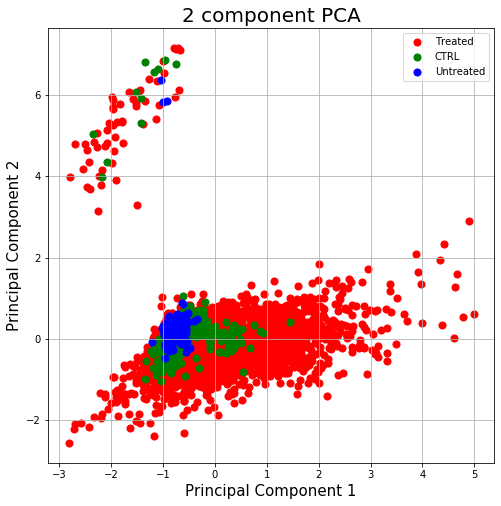

In [11]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)
targets = ['Treated', 'CTRL', 'Untreated']
colors = ['r', 'g', 'b']
for target, color in zip(targets,colors):
    indicesToKeep = finalDf['Image_Metadata_ASSAY_WELL_ROLE'] == target
    ax.scatter(finalDf.loc[indicesToKeep, 'principal component 1']
               , finalDf.loc[indicesToKeep, 'principal component 2']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [12]:
pca.explained_variance_ratio_
#again not really working to explain the variance - there are no hidden relationships that can be found froomm this data, 


array([0.24771714, 0.23360374])

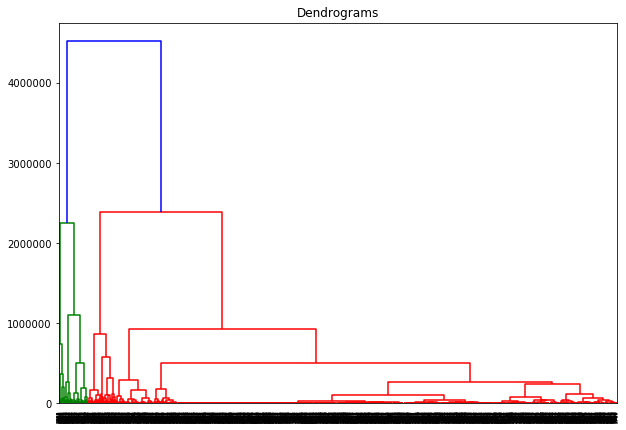

In [13]:
#try hierachical clustering on existing data - and then Kmeans clustering(my fave)
#add labels to data
from scipy.cluster import hierarchy

cyto['symb'] = cellPD['Image_Metadata_GeneSymbol']
cyto = cyto.set_index('symb')
#del cyto.index.name


import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cyto, method='ward'))


{'icoord': [[5.0, 5.0, 15.0, 15.0],
  [25.0, 25.0, 35.0, 35.0],
  [10.0, 10.0, 30.0, 30.0],
  [45.0, 45.0, 55.0, 55.0],
  [65.0, 65.0, 75.0, 75.0],
  [50.0, 50.0, 70.0, 70.0],
  [20.0, 20.0, 60.0, 60.0]],
 'dcoord': [[0.0, 745853.7705720653, 745853.7705720653, 0.0],
  [0.0, 1104032.107379845, 1104032.107379845, 0.0],
  [745853.7705720653,
   2257469.8944885815,
   2257469.8944885815,
   1104032.107379845],
  [0.0, 869788.019421715, 869788.019421715, 0.0],
  [0.0, 930466.8774242637, 930466.8774242637, 0.0],
  [869788.019421715, 2385623.605326217, 2385623.605326217, 930466.8774242637],
  [2257469.8944885815, 4526423.68713883, 4526423.68713883, 2385623.605326217]],
 'ivl': ['(4)', '(28)', '(39)', '(89)', '(73)', '(79)', '(210)', '(2550)'],
 'leaves': [6119, 6132, 6129, 6133, 6123, 6135, 6130, 6134],
 'color_list': ['g', 'g', 'g', 'r', 'r', 'r', 'b']}

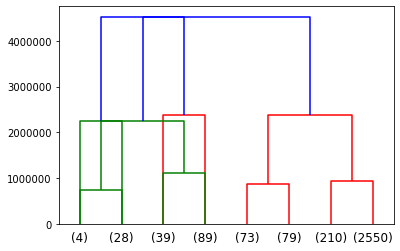

In [14]:
# Calculate the distance between each sample
Z = hierarchy.linkage(cyto, 'ward')
 
# method 1: lastp
hierarchy.dendrogram(Z, truncate_mode = 'lastp', p=4 ) # -> you will have 4 leaf at the bottom of the plot
 
# method 2: level
hierarchy.dendrogram(Z, truncate_mode = 'level', p=2) # -> No more than ``p`` levels of the dendrogram tree are displayed.


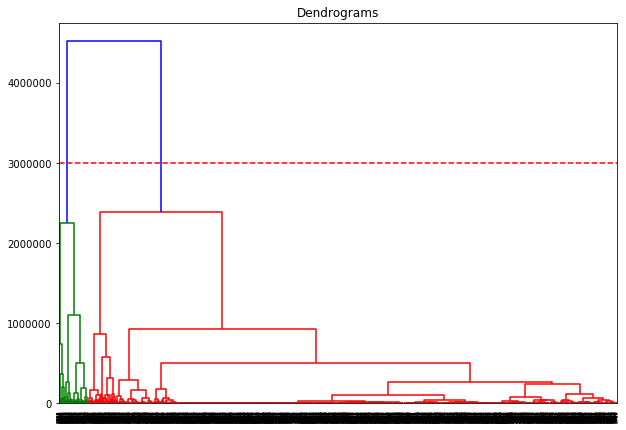

In [15]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrograms")  
dend = shc.dendrogram(shc.linkage(cyto, method='ward'))
plt.axhline(y=3000000, color='r', linestyle='--')

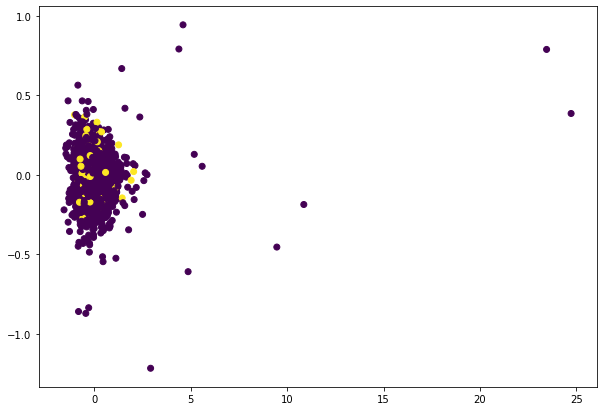

In [16]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')  
cluster.fit_predict(cyto)
plt.figure(figsize=(10, 7))  
#literally just scatter plot - do multiple scatter plots with a few selected features.
plt.scatter(cyto['Cytoplasm_AreaShape_Area'], cyto['Cytoplasm_AreaShape_Center_X'], c=cluster.labels_) 

C:\machinelearning\my_env\lib\site-packages\seaborn\matrix.py:624: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


<Figure size 1080x1080 with 0 Axes>

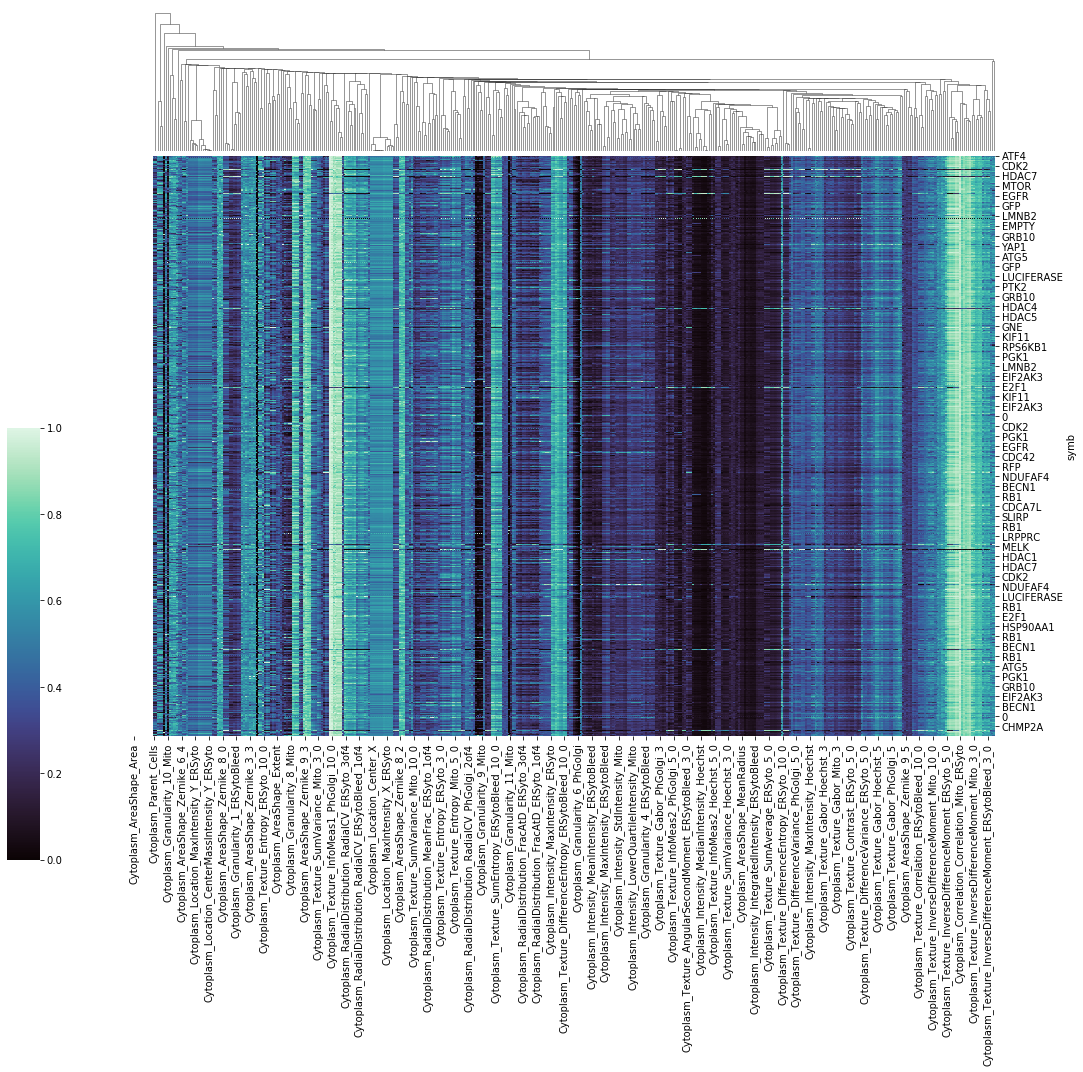

In [17]:
 

# Libraries
import seaborn as sns
import pandas as pd
from matplotlib import pyplot as plt
 
cyto
 
# Prepare a vector of color mapped to the 'cyl' column
my_palette = dict(zip(cyto.Cytoplasm_AreaShape_Area.unique(), ["orange","yellow","brown"]))
row_colors = cyto.Cytoplasm_AreaShape_Area.map(my_palette)
 
plt.figure(figsize=(15, 15))
# plot
snsplot = sns.clustermap(cyto, method="single", cmap="mako", standard_scale=1, row_colors=row_colors,
                    figsize=(15, 15),
                   row_cluster=False,
                   dendrogram_ratio=(.1, .2),
                   cbar_pos=(0, .2, .03, .4))

#
 # width and height in inches

#save that 


snsplot.savefig("output.png")

In [40]:


#cyto.info(10)
print(len(cellPD['Image_Metadata_GeneSymbol']))
print(len(cellPD.iloc[:,16:447]))

import plotly
import plotly.plotly as py
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)    
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import numpy as np
from scipy.spatial.distance import pdist, squareform

3072
3072


In [43]:

import plotly
import plotly.graph_objects as go
import plotly.figure_factory as ff

import numpy as np
from scipy.spatial.distance import pdist, squareform


# get data
data = cellPD.iloc[:,16:447]
#data_array = data.view((np.float, len(data.dtype.names)))
data_array = data
#ata_array = data_array.transpose()


labels = cellPD['Image_Metadata_GeneSymbol']
# Initialize figure by creating upper dendrogram
fig = ff.create_dendrogram(data_array , orientation='bottom')


In [45]:
for i in range(len(fig['data'])):
    fig['data'][i]['yaxis'] = 'y2'

# Create Side Dendrogram
dendro_side = ff.create_dendrogram(data_array, orientation='right')
for i in range(len(dendro_side['data'])):
    dendro_side['data'][i]['xaxis'] = 'x2'

# Add Side Dendrogram Data to Figure
for data in dendro_side['data']:
    fig.add_trace(data)

# Create Heatmap
dendro_leaves = dendro_side['layout']['yaxis']['ticktext']
dendro_leaves = list(map(int, dendro_leaves))
data_dist = pdist(data_array)
heat_data = squareform(data_dist)
heat_data = heat_data[dendro_leaves,:]
heat_data = heat_data[:,dendro_leaves]

heatmap = [
    go.Heatmap(
        x = dendro_leaves,
        y = dendro_leaves,
        z = heat_data,
        colorscale = 'Blues'
    )
]

heatmap[0]['x'] = fig['layout']['xaxis']['tickvals']
heatmap[0]['y'] = dendro_side['layout']['yaxis']['tickvals']

# Add Heatmap Data to Figure
for data in heatmap:
    fig.add_trace(data)

# Edit Layout
fig.update_layout({'width':800, 'height':800,
                         'showlegend':False, 'hovermode': 'closest',
                         })
# Edit xaxis
fig.update_layout(xaxis={'domain': [.15, 1],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'ticks':""})
# Edit xaxis2
fig.update_layout(xaxis2={'domain': [0, .15],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Edit yaxis
fig.update_layout(yaxis={'domain': [0, .85],
                                  'mirror': False,
                                  'showgrid': False,
                                  'showline': False,
                                  'zeroline': False,
                                  'showticklabels': False,
                                  'ticks': ""
                        })
# Edit yaxis2
fig.update_layout(yaxis2={'domain':[.825, .975],
                                   'mirror': False,
                                   'showgrid': False,
                                   'showline': False,
                                   'zeroline': False,
                                   'showticklabels': False,
                                   'ticks':""})

# Plot!
fig.show()

MemoryError: Unable to allocate 72.0 MiB for an array with shape (3072, 3072) and data type float64